<a href="https://colab.research.google.com/github/thudoan1706/CLI/blob/main/Computer_Vision/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.geeksforgeeks.org/k-means-clustering-introduction/

In [46]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

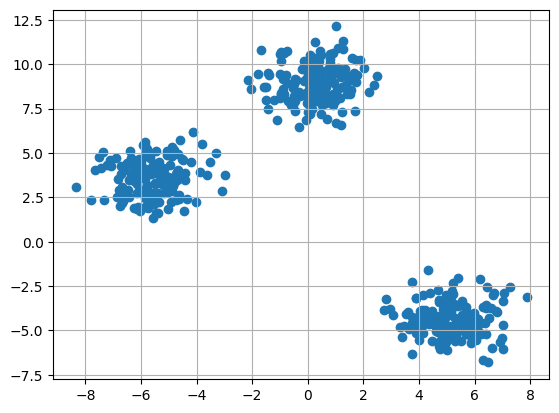

In [48]:
X,_ = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


*   `X.shape[1]` : gets number of columns in X array
*   `np.random.random((X.shape[1],))` : generate NumPy array with random numbers between 0 and 1
*   `2 * np.random.random((X.shape[1],)) - 1` : scales the shift between -1 and 1
*   `center` : scales the random number between -2 and 2



In [49]:
k = 3
  
clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
      
    clusters[idx] = cluster
      
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

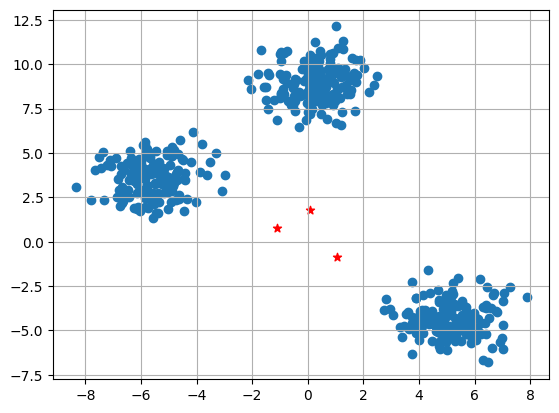

In [50]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0], center[1], marker = '*', c='red')
plt.show()

In [51]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [52]:
# Implementing Expectation Step
def assign_clusters(X, clusters):
  # X.shape[0] : rows / data points
  for idx in range(X.shape[0]):
    dist = []
    curr_x = X[idx]  # a list of data points [x, y]
    # Calculate the distance between each data point with defined # clusters
    for i in range(k):
      dis = distance(curr_x, clusters[i]['center'])
      dist.append(dis)
    # Return the index of the smallest value in dist
    curr_cluster = np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters

In [53]:
# Implementing Maximization Step
def update_clusters(X, clusters):
  for i in range(k):
    # compute the mean along the vertical axis (rows) 
    # using axis=0, you are essentially calculating the 
    # average value for each feature (column) across all 
    # the data points in the cluster. 
    points = np.array(clusters[i]['points'])
    if (points.shape[0] > 0):
      new_center = points.mean(axis=0)
      clusters[i]['center'] = new_center
      clusters[i]['points'] = []
    return clusters

In [54]:
# A function to predict the cluster for the datapoints
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        #  find the index of the minimum distance in the dist list,
        #  not the distance itself.
        pred.append(np.argmin(dist))
    return pred

In [55]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

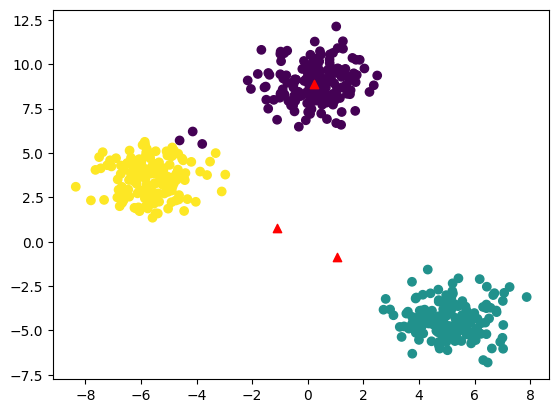

In [56]:
plt.scatter(X[:,0],X[:,1], c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()